**Disease Prediction by System Using Supervised Machine Learning**

Group Members:

1. M Satya Sai Teja
2. Shubhanshu
3. Mohit Gupta
4. M S K Chaitanya
5. Akshat
6. Vidhan Chandra Ray


This Machine Learning Model basically predicts diseases based on symptoms.

In [89]:
!unzip archive.zip

Archive:  archive.zip
replace Testing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [94]:
train = pd.read_csv("Training.csv")

In [95]:
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [96]:
# Lets Remove NAN values in the last column

train = train.iloc[:, :-1]
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [97]:
test = pd.read_csv("Testing.csv")

In [98]:
test.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [99]:
# Now, Lets split the features and labels of train data and test data 

train_features = train.iloc[:, :-1].values
train_labels = train.iloc[:, -1].values

test_features = test.iloc[:, :-1].values
test_labels = test.iloc[:, -1].values

In [100]:
# Lets view train features

train_features = pd.DataFrame(train_features)
train_features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Lets view train labels

train_labels = pd.DataFrame(train_labels)
train_labels.head(5)

,0
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [102]:
# Lets view test features

test_features = pd.DataFrame(test_features)
test_features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# # Lets view test labels

test_labels = pd.DataFrame(test_labels)
test_labels.head(5)

,0
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction


In [113]:
# Lets Encode the labels in train and test data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_labels = encoder.fit_transform(train.iloc[:, -1])
test_labels = encoder.transform(test.iloc[:, -1])

In [114]:
# Encoded train labels

train_labels = pd.DataFrame(train_labels)
train_labels.head(5)

,0
0,15
1,15
2,15
3,15
4,15


In [115]:
# Encoded test labels

test_labels = pd.DataFrame(test_labels)
test_labels.head(5)

,0
0,15
1,4
2,16
3,9
4,14


In [117]:
# Reshape test labels to a 1d array using ravel()

from numpy import ravel

test_labels = ravel(test_labels)
train_labels = ravel(train_labels)

**Implementing Support Vector Machine**

In [118]:
# First, Lets Implement Support Vector Machine

from sklearn.svm import SVC

SVM = SVC(kernel = 'linear')

In [119]:
# Lets prepare SVM model using training features and labels

SVM.fit(train_features, train_labels)

SVC(kernel='linear')

In [120]:
# Lets predict the test labels for test features

SVM_test_labels_pred = SVM.predict(test_features)

In [121]:
# Check the accuracy

SVM_accuracy = accuracy_score(test_labels, SVM_test_labels_pred)

print("SVM Accuracy : ", SVM_accuracy)

SVM Accuracy :  1.0


In [122]:
# Precision

SVM_precision = precision_score(test_labels, SVM_test_labels_pred, average = 'macro')

print("SVM Precison : ", SVM_precision)

SVM Precison :  1.0


In [123]:
# Recall

SVM_recall = recall_score(test_labels, SVM_test_labels_pred, average='macro')

print("SVM Recall : ", SVM_recall)

SVM Recall :  1.0


In [124]:
# F1 - Score

SVM_f1 = f1_score(test_labels, SVM_test_labels_pred, average='macro')

print("SVM F1 Score : ", SVM_f1)

SVM F1 Score :  1.0


**Implementing Naive Bayes Model**

In [125]:
# Lets implement Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

In [126]:
# Lets prepare NB model using training features and labels

NB.fit(train_features, train_labels)

GaussianNB()

In [127]:
# Lets predict the test labels for test features

NB_test_labels_pred = NB.predict(test_features)

In [128]:
# Check the accuracy

NB_accuracy = accuracy_score(test_labels, NB_test_labels_pred)

print("NB Accuracy : ", NB_accuracy)

NB Accuracy :  1.0


In [129]:
# Precision

NB_precision = precision_score(test_labels, NB_test_labels_pred, average = 'macro')

print("NB Precison : ", NB_precision)

NB Precison :  1.0


In [130]:
# Recall

NB_recall = recall_score(test_labels, NB_test_labels_pred, average='macro')

print("NB Recall : ", NB_recall)

NB Recall :  1.0


In [131]:
# F1 - Score

NB_f1 = f1_score(test_labels, NB_test_labels_pred, average='macro')

print("NB F1 Score : ", NB_f1)

NB F1 Score :  1.0


**Implementing Logistic Regression**

In [132]:
# Lets implement Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [133]:
# Lets prepare LR model using training features and labels

LR.fit(train_features, train_labels)

LogisticRegression()

In [134]:
# Lets predict the test labels for test features

LR_test_labels_pred = LR.predict(test_features)

In [135]:
# Check the accuracy

LR_accuracy = accuracy_score(test_labels, LR_test_labels_pred)

print("LR Accuracy : ", LR_accuracy)

LR Accuracy :  1.0


In [136]:
# Precision

LR_precision = precision_score(test_labels, LR_test_labels_pred, average = 'macro')

print("LR Precison : ", LR_precision)

LR Precison :  1.0


In [137]:
# Recall

LR_recall = recall_score(test_labels, LR_test_labels_pred, average='macro')

print("LR Recall : ", LR_recall)

LR Recall :  1.0


In [138]:
# F1 - Score

LR_f1 = f1_score(test_labels, LR_test_labels_pred, average='macro')

print("LR F1 Score : ", LR_f1)

LR F1 Score :  1.0


**Implementing K Nearest Neighbour Algorithm**

In [139]:
# Lets implement KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

In [140]:
KNN.fit(train_features, train_labels)

KNeighborsClassifier()

In [141]:
KNN_test_labels_pred = KNN.predict(test_features)

In [142]:
# Accuracy

KNN_accuracy = accuracy_score(test_labels, KNN_test_labels_pred)

print("KNN Accuracy : ", KNN_accuracy)

KNN Accuracy :  1.0


In [143]:
# Precision

KNN_precision = precision_score(test_labels, KNN_test_labels_pred, average = 'macro')

print("KNN Precison : ", KNN_precision)

KNN Precison :  1.0


In [144]:
# Recall

KNN_recall = recall_score(test_labels, KNN_test_labels_pred, average='macro')

print("KNN Recall : ", KNN_recall)

KNN Recall :  1.0


In [145]:
# F1 - Score

KNN_f1 = f1_score(test_labels, KNN_test_labels_pred, average='macro')

print("KNN F1 Score : ", KNN_f1)

KNN F1 Score :  1.0


**Implementing Decision Tree Algorithm**

In [146]:
# Lets implement Decision Tree

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [147]:
DT.fit(train_features, train_labels)

DecisionTreeClassifier()

In [148]:
DT_test_labels_pred = DT.predict(test_features)

In [149]:
# Accuracy

DT_accuracy = accuracy_score(test_labels, DT_test_labels_pred)

print("DT Accuracy : ", DT_accuracy)

DT Accuracy :  0.9761904761904762


In [150]:
# Precision

DT_precision = precision_score(test_labels, DT_test_labels_pred, average = 'macro')

print("DT Precison : ", DT_precision)

DT Precison :  0.9878048780487805


In [151]:
# Recall

DT_recall = recall_score(test_labels, DT_test_labels_pred, average='macro')

print("DT Recall : ", DT_recall)

DT Recall :  0.9878048780487805


In [152]:
# F1 - Score

DT_f1 = f1_score(test_labels, DT_test_labels_pred, average='macro')

print("DT F1 Score : ", DT_f1)

DT F1 Score :  0.9837398373983739


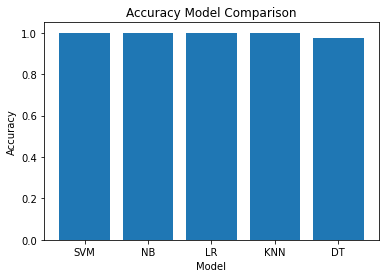

In [157]:
# Accuracy

names = ['SVM', 'NB', 'LR', 'KNN', 'DT']
scores = [SVM_accuracy, NB_accuracy, LR_accuracy, KNN_accuracy, DT_accuracy]

plt.bar(names, scores)
plt.title("Accuracy Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

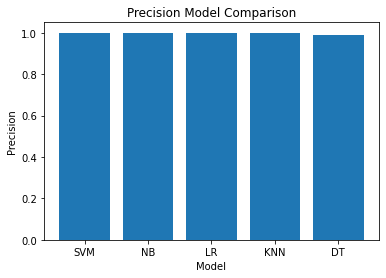

In [158]:
# Precision

names = ['SVM', 'NB', 'LR', 'KNN', 'DT']
scores = [SVM_precision, NB_precision, LR_precision, KNN_precision, DT_precision]

plt.bar(names, scores)
plt.title("Precision Model Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.show()

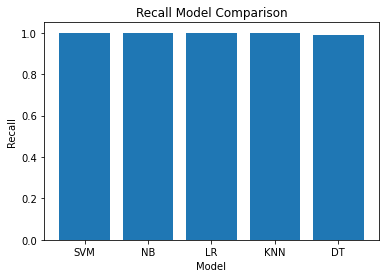

In [159]:
# Recall 

names = ['SVM', 'NB', 'LR', 'KNN', 'DT']
scores = [SVM_recall, NB_recall, LR_recall, KNN_recall, DT_recall]

plt.bar(names, scores)
plt.title("Recall Model Comparison")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.show()

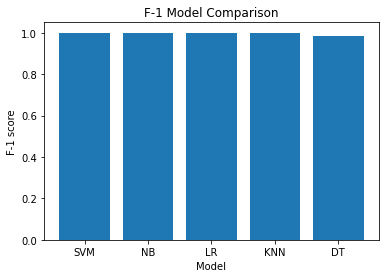

In [160]:
# F-1 Score 

names = ['SVM', 'NB', 'LR', 'KNN', 'DT']
scores = [SVM_f1, NB_f1, LR_f1, KNN_f1, DT_f1]

plt.bar(names, scores)
plt.title("F-1 Model Comparison")
plt.xlabel("Model")
plt.ylabel("F-1 score")
plt.show()

All the four models performed better when compared with Decision Tree